In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
from sklearn.preprocessing import OneHotEncoder
from pandas.plotting import radviz
'''
    构建一个具有1个隐藏层的神经网络，隐层的大小为10
    输入层为2（或4）个特征；输出层1个节点，结果为0或1
    当特征为2个时，表头为：'SepalLength', 'SepalWidth', 'species'，迭代1000次，正确率为100%
    当特征为4个时，表头为：'SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'species'，迭代1000次，正确率为63.64%
'''


# 画图看原始数据
def draw_plot(X, Y):
    # 用来正常显示中文标签
    plt.rcParams['font.sans-serif'] = ['SimHei']

    plt.scatter(X[0, :], X[1, :], c=Y[0, :], s=50, cmap=plt.cm.Spectral)
    plt.title('蓝色-Versicolor， 红色-Virginica')
    plt.xlabel('花瓣长度')
    plt.ylabel('花瓣宽度')
    plt.show()

In [ ]:
# 1.初始化参数
def initialize_parameters(n_x, n_h, n_y):
    np.random.seed(2)

    # 权重和偏置矩阵
    w1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros(shape=(n_h, 1))
    w2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros(shape=(n_y, 1))

    # 通过字典存储参数
    parameters = {'w1': w1, 'b1': b1, 'w2': w2, 'b2': b2}

    return parameters

In [ ]:
# 2.前向传播
def forward_propagation(X, parameters):
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']

    # 通过前向传播来计算a2
    z1 = np.dot(w1, X) + b1     # 这个地方需注意矩阵加法：虽然(w1*X)和b1的维度不同，但可以相加
    a1 = np.tanh(z1)            # 使用tanh作为第一层的激活函数
    z2 = np.dot(w2, a1) + b2
    a2 = 1 / (1 + np.exp(-z2))  # 使用sigmoid作为第二层的激活函数

    # 通过字典存储参数
    cache = {'z1': z1, 'a1': a1, 'z2': z2, 'a2': a2}

    return a2, cache


In [ ]:
# 3.计算代价函数
def compute_cost(a2, Y):
    m = Y.shape[1]      # Y的列数即为总的样本数

    # 采用交叉熵（cross-entropy）作为代价函数
    logprobs = np.multiply(np.log(a2), Y) + np.multiply((1 - Y), np.log(1 - a2))
    cost = - np.sum(logprobs) / m

    return cost

In [ ]:
# 4.反向传播（计算代价函数的导数）
def backward_propagation(parameters, cache, X, Y):
    m = Y.shape[1]

    w2 = parameters['w2']

    a1 = cache['a1']
    a2 = cache['a2']

    # 反向传播，计算dw1、db1、dw2、db2
    dz2 = a2 - Y
    dw2 = (1 / m) * np.dot(dz2, a1.T)
    db2 = (1 / m) * np.sum(dz2, axis=1, keepdims=True)
    dz1 = np.multiply(np.dot(w2.T, dz2), 1 - np.power(a1, 2))
    dw1 = (1 / m) * np.dot(dz1, X.T)
    db1 = (1 / m) * np.sum(dz1, axis=1, keepdims=True)

    grads = {'dw1': dw1, 'db1': db1, 'dw2': dw2, 'db2': db2}

    return grads


In [ ]:
# 5.更新参数
def update_parameters(parameters, grads, learning_rate=0.4):
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']

    dw1 = grads['dw1']
    db1 = grads['db1']
    dw2 = grads['dw2']
    db2 = grads['db2']

    # 更新参数
    w1 = w1 - dw1 * learning_rate
    b1 = b1 - db1 * learning_rate
    w2 = w2 - dw2 * learning_rate
    b2 = b2 - db2 * learning_rate

    parameters = {'w1': w1, 'b1': b1, 'w2': w2, 'b2': b2}

    return parameters

In [ ]:
# 建立神经网络
def nn_model(X, Y, n_h, n_input, n_output, num_iterations=10000, print_cost=False):
    np.random.seed(3)

    n_x = n_input           # 输入层节点数
    n_y = n_output          # 输出层节点数

    # 1.初始化参数
    parameters = initialize_parameters(n_x, n_h, n_y)

    # 梯度下降循环
    for i in range(0, num_iterations):
        # 2.前向传播
        a2, cache = forward_propagation(X, parameters)
        # 3.计算代价函数
        cost = compute_cost(a2, Y)
        # 4.反向传播
        grads = backward_propagation(parameters, cache, X, Y)
        # 5.更新参数
        parameters = update_parameters(parameters, grads)

        # 每1000次迭代，输出一次代价函数
        if print_cost and i % 1000 == 0:
            print('迭代第%i次，代价函数为：%f' % (i, cost))

    return parameters

In [ ]:
# 6.模型评估
def predict(parameters, x_test, y_test):
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']

    z1 = np.dot(w1, x_test) + b1
    a1 = np.tanh(z1)
    z2 = np.dot(w2, a1) + b2
    a2 = 1 / (1 + np.exp(-z2))

    # 结果的维度
    n_rows = a2.shape[0]
    n_cols = a2.shape[1]

    # 预测值结果存储
    output = np.empty(shape=(n_rows, n_cols), dtype=int)

    for i in range(n_rows):
        for j in range(n_cols):
            if a2[i][j] > 0.5:
                output[i][j] = 1
            else:
                output[i][j] = 0

    # 将独热编码反转为标签
    output = encoder.inverse_transform(output.T)
    output = output.reshape(1, output.shape[0])
    output = output.flatten()

    print('预测结果：', output)
    print('真实结果：', y_test)

    count = 0
    for k in range(0, n_cols):
        if output[k] == y_test[k]:
            count = count + 1
        else:
            print('错误分类样本的序号：', k + 1)

    acc = count / int(a2.shape[1]) * 100
    print('准确率：%.2f%%' % acc)

    return output

迭代第0次，代价函数为：2.079030
迭代第1000次，代价函数为：0.466981
迭代第2000次，代价函数为：0.167383
迭代第3000次，代价函数为：0.104203
迭代第4000次，代价函数为：0.088870
迭代第5000次，代价函数为：0.086663
迭代第6000次，代价函数为：0.085129
迭代第7000次，代价函数为：0.084027
迭代第8000次，代价函数为：0.083229
迭代第9000次，代价函数为：0.082648
用时：32ms
预测结果： [1 2 0 1 1 1 0 2 1 2 2 0 2 1 1 0 1 0 0 2 0 1 2 2 1 1 0 1 2 1]
真实结果： [1 2 0 1 1 1 0 2 1 2 2 0 2 1 1 0 1 0 0 2 0 1 2 1 1 1 0 1 2 1]
错误分类样本的序号： 24
准确率：96.67%


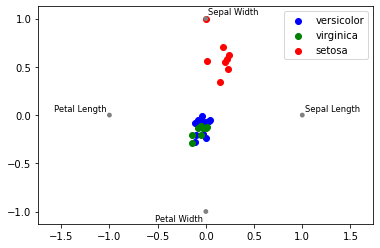

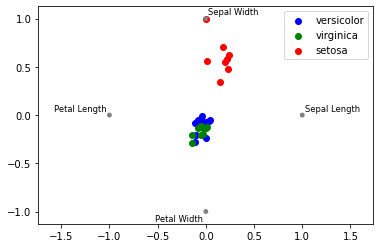

In [ ]:
# 7.结果可视化
# 特征有4个维度，类别有1个维度，一共5个维度，故采用了RadViz图
def result_visualization(x_test, y_test, result):
    cols = y_test.shape[0]
    y = []
    pre = []
    labels = ['setosa', 'versicolor', 'virginica']

    # 将0、1、2转换成setosa、versicolor、virginica
    for i in range(cols):
        y.append(labels[y_test[i]])
        pre.append(labels[result[i]])

    # 将特征和类别矩阵拼接起来
    real = np.column_stack((x_test.T, y))
    prediction = np.column_stack((x_test.T, pre))

    # 转换成DataFrame类型，并添加columns
    df_real = pd.DataFrame(real, index=None, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Species'])
    df_prediction = pd.DataFrame(prediction, index=None, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Species'])

    # 将特征列转换为float类型，否则radviz会报错
    df_real[['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']] = df_real[['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']].astype(float)
    df_prediction[['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']] = df_prediction[['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']].astype(float)

    # 绘图
    plt.figure('真实分类')
    radviz(df_real, 'Species', color=['blue', 'green', 'red', 'yellow'])
    plt.figure('预测分类')
    radviz(df_prediction, 'Species', color=['blue', 'green', 'red', 'yellow'])
    plt.show()


if __name__ == "__main__":
    # 读取数据
    iris = pd.read_csv('/content/iris_training.csv')
    X = iris[['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']].values.T  # T是转置
    Y = iris['species'].values

    # 将标签转换为独热编码
    encoder = OneHotEncoder()
    Y = encoder.fit_transform(Y.reshape(Y.shape[0], 1))
    Y = Y.toarray().T
    Y = Y.astype('uint8')

    # 开始训练
    start_time = datetime.datetime.now()
    # 输入4个节点，隐层10个节点，输出3个节点，迭代10000次
    parameters = nn_model(X, Y, n_h=10, n_input=4, n_output=3, num_iterations=10000, print_cost=True)
    end_time = datetime.datetime.now()
    print("用时：" + str(round((end_time - start_time).microseconds / 1000)) + 'ms')

    # 对模型进行测试
    data_test = pd.read_csv('/content/iris_test.csv')
    x_test = data_test[['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']].values.T
    y_test = data_test['species'].values

    result = predict(parameters, x_test, y_test)

    # 分类结果可视化
    result_visualization(x_test, y_test, result)
